In [1]:
library(data.table)
library(plyr)
library(tidyverse)
library(forecast)
library(lmtest)
library(ggplot2)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ dplyr::between()   masks data.table::between()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
✖ purrr::transpose() masks data.table::transpose()
Loading required package: zoo

Atta

In [2]:
getwd()

[1] "/Users/Ryan/Desktop/datareach/disease prediction"

In [3]:
#read in the cleaned data file
data <- read_csv('SG14-16.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  V0 = col_integer(),
  V3 = col_integer(),
  V4 = col_integer(),
  V5 = col_integer(),
  V6 = col_integer(),
  V7 = col_integer(),
  V8 = col_integer(),
  V9 = col_integer(),
  V10 = col_integer(),
  V11 = col_integer(),
  V12 = col_integer(),
  V13 = col_integer(),
  V14 = col_integer(),
  V15 = col_integer(),
  V16 = col_integer(),
  V17 = col_integer(),
  V18 = col_integer(),
  V19 = col_integer(),
  V20 = col_integer(),
  V21 = col_integer()
  # ... with 125 more columns
)
See spec(...) for full column specifications.


In [4]:
#get rid of trailing NA's
data1 = data[,1:147]

In [5]:
data1

V0  V1        V2                V3  V4  V5  V6  V7  V8  V9  ⋯ V137 V138
1    1  ADAMAOUA  BANKIM              1   0   7   2   7   1   1 ⋯  0    5  
2    2  ADAMAOUA  BANYO               0  NA   2  NA   5   0   1 ⋯  4    0  
3    3  ADAMAOUA  DJOHONG             3   4   1   2   0   0   1 ⋯  3    0  
4    4  ADAMAOUA  MEIGANGA            2   0   2   0  NA   1   0 ⋯  0    0  
5    5  ADAMAOUA  NGAOUNDAL           2   9   0   0   5   0   0 ⋯  6   14  
6    6  ADAMAOUA  NGAOUNDERE RURAL   84  79  59  78  53  43  72 ⋯ 34   46  
7    7  ADAMAOUA  NGAOUNDERE URBAIN  55  72  95  76 116  88 102 ⋯ 30   25  
8    8  ADAMAOUA  TIBATI              7  15   9  12  14  10  12 ⋯  9    9  
9    9  ADAMAOUA  TIGNERE            27   0  27  27  17   4  14 ⋯  6   10  
10  10  CENTRE    AKONOLINGA          0   1   0   2   1   0   0 ⋯  2    2  
11  11  CENTRE    AWAE                0   5   0   1   1   0   0 ⋯  8    1  
12  12  CENTRE    AYOS                0   0   0   2   3   0   0 ⋯  1    4  
13  13  CENTRE    BAFIA              12  20   2   7   7   0   6 ⋯ 14   17  
14  14  CENTRE    BIYEM ASSI        159  94 106  89  66 104  86 ⋯ 40   53  
15  15  CENTRE    CITE VERTE         31  34  30  33  18  52  28 ⋯ 45   31  
16  16  CENTRE    DJOUNGOLO         158 148 180 120 107 138 153 ⋯ 50   69  
17  17  CENTRE    EBEBDA              6   7   6   2   1   3   1 ⋯  2    0  
18  18  CENTRE    EFOULAN            30   0  31  34  29  26   0 ⋯ 47   65  
19  19  CENTRE    ELIG MFOMO         12   8   3   7   2   2   4 ⋯  3    2  
20  20  CENTRE    ESEKA               0   1   6   2   8   0   3 ⋯ NA    2  
21  21  CENTRE    ESSE                0   0   7   4  11  13   7 ⋯ NA    5  
22  22  CENTRE    EVODOULA           14   3   7   4   0   0   4 ⋯ 10    8  
23  23  CENTRE    MBALMAYO            3   4   2   6  49   0  10 ⋯  9    5  
24  24  CENTRE    MBANDJOCK           1   4   4   5   2   3   2 ⋯ 28   31  
25  25  CENTRE    MBANKOMO            2   3   4   1   1   5   0 ⋯  2    4  
26  26  CENTRE    MFOU                0   8   8  11  30   0   2 ⋯ 16   14  
27  27  CENTRE    MONATELE           NA   3   0   0   0   1   7 ⋯  1    2  
28  28  CENTRE    NANGA EBOKO        15   2   1   4   2   0   0 ⋯  0    2  
29  29  CENTRE    NDIKINIMEKI        10   0   8   7   0   0   0 ⋯  0    9  
30  30  CENTRE    NGOG MAPUBI         3   0   0   4   8   0   3 ⋯  5    7  
⋮   ⋮   ⋮         ⋮                 ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋱ ⋮    ⋮   
160 160 OUEST     PENKA MICHEL        0  0    0   0  0   2   0  ⋯  0    0  
161 161 OUEST     SANTCHOU            3  0    1   0  2   1   1  ⋯  3    3  
162 162 SUD       AMBAM              27 10    3   8  5   7   5  ⋯ 14   15  
163 163 SUD       DJOUM               7  1    2   3  2   0   1  ⋯  3    0  
164 164 SUD       EBOLOWA             1  3    0   0  4   0   0  ⋯  9    0  
165 165 SUD       KRIBI             126 16  104  78 17  79   2  ⋯ 34   49  
166 166 SUD       LOLODORF            1  2    3   1  3   4   1  ⋯  0    0  
167 167 SUD       MEYOMESSALA        14  7    5  18  0  10  15  ⋯ 18   12  
168 168 SUD       MVANGAN             0  0    0   0  0   0   0  ⋯  0    1  
169 169 SUD       OLAMZE              6  5    1   3  3   4   3  ⋯  6    5  
170 170 SUD       SANGMELIMA          9  2   28  16  3   1   3  ⋯  5    4  
171 171 SUD       ZOETELE             0  3    1   0  0   0   0  ⋯  6    6  
172 172 SUD OUEST AKWAYA              0  3    0   0  0   0   0  ⋯  6    9  
173 173 SUD OUEST BAKASSI             3  1    0   1  2   0   0  ⋯  0    0  
174 174 SUD OUEST BANGEM              5  5    2   4 11   5   2  ⋯  0    0  
175 175 SUD OUEST BUEA               10 19   15   8 12  33  16  ⋯  0    0  
176 176 SUD OUEST EKONDO TITI        11  9    0  18  8  14   7  ⋯  5    2  
177 177 SUD OUEST EYUMODJOCK          4  4    5   8  0   1   2  ⋯  0    0  
178 178 SUD OUEST FONTEM              4  2    1   3  2   1   0  ⋯  0    0  
179 179 SUD OUEST KONYE               7 13   14  13  0  12   9  ⋯ 13   11  
180 180 SUD OUEST KUMBA              13 11    1   1 

In [6]:
#convert data to numerical type
cols = c(4:147)
data1[,cols] = apply(data1[,cols], 2, function(x) as.numeric(x))

In [7]:
data1

V0  V1        V2                V3  V4  V5  V6  V7  V8  V9  ⋯ V137 V138
1    1  ADAMAOUA  BANKIM              1   0   7   2   7   1   1 ⋯  0    5  
2    2  ADAMAOUA  BANYO               0  NA   2  NA   5   0   1 ⋯  4    0  
3    3  ADAMAOUA  DJOHONG             3   4   1   2   0   0   1 ⋯  3    0  
4    4  ADAMAOUA  MEIGANGA            2   0   2   0  NA   1   0 ⋯  0    0  
5    5  ADAMAOUA  NGAOUNDAL           2   9   0   0   5   0   0 ⋯  6   14  
6    6  ADAMAOUA  NGAOUNDERE RURAL   84  79  59  78  53  43  72 ⋯ 34   46  
7    7  ADAMAOUA  NGAOUNDERE URBAIN  55  72  95  76 116  88 102 ⋯ 30   25  
8    8  ADAMAOUA  TIBATI              7  15   9  12  14  10  12 ⋯  9    9  
9    9  ADAMAOUA  TIGNERE            27   0  27  27  17   4  14 ⋯  6   10  
10  10  CENTRE    AKONOLINGA          0   1   0   2   1   0   0 ⋯  2    2  
11  11  CENTRE    AWAE                0   5   0   1   1   0   0 ⋯  8    1  
12  12  CENTRE    AYOS                0   0   0   2   3   0   0 ⋯  1    4  
13  13  CENTRE    BAFIA              12  20   2   7   7   0   6 ⋯ 14   17  
14  14  CENTRE    BIYEM ASSI        159  94 106  89  66 104  86 ⋯ 40   53  
15  15  CENTRE    CITE VERTE         31  34  30  33  18  52  28 ⋯ 45   31  
16  16  CENTRE    DJOUNGOLO         158 148 180 120 107 138 153 ⋯ 50   69  
17  17  CENTRE    EBEBDA              6   7   6   2   1   3   1 ⋯  2    0  
18  18  CENTRE    EFOULAN            30   0  31  34  29  26   0 ⋯ 47   65  
19  19  CENTRE    ELIG MFOMO         12   8   3   7   2   2   4 ⋯  3    2  
20  20  CENTRE    ESEKA               0   1   6   2   8   0   3 ⋯ NA    2  
21  21  CENTRE    ESSE                0   0   7   4  11  13   7 ⋯ NA    5  
22  22  CENTRE    EVODOULA           14   3   7   4   0   0   4 ⋯ 10    8  
23  23  CENTRE    MBALMAYO            3   4   2   6  49   0  10 ⋯  9    5  
24  24  CENTRE    MBANDJOCK           1   4   4   5   2   3   2 ⋯ 28   31  
25  25  CENTRE    MBANKOMO            2   3   4   1   1   5   0 ⋯  2    4  
26  26  CENTRE    MFOU                0   8   8  11  30   0   2 ⋯ 16   14  
27  27  CENTRE    MONATELE           NA   3   0   0   0   1   7 ⋯  1    2  
28  28  CENTRE    NANGA EBOKO        15   2   1   4   2   0   0 ⋯  0    2  
29  29  CENTRE    NDIKINIMEKI        10   0   8   7   0   0   0 ⋯  0    9  
30  30  CENTRE    NGOG MAPUBI         3   0   0   4   8   0   3 ⋯  5    7  
⋮   ⋮   ⋮         ⋮                 ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋱ ⋮    ⋮   
160 160 OUEST     PENKA MICHEL        0  0    0   0  0   2   0  ⋯  0    0  
161 161 OUEST     SANTCHOU            3  0    1   0  2   1   1  ⋯  3    3  
162 162 SUD       AMBAM              27 10    3   8  5   7   5  ⋯ 14   15  
163 163 SUD       DJOUM               7  1    2   3  2   0   1  ⋯  3    0  
164 164 SUD       EBOLOWA             1  3    0   0  4   0   0  ⋯  9    0  
165 165 SUD       KRIBI             126 16  104  78 17  79   2  ⋯ 34   49  
166 166 SUD       LOLODORF            1  2    3   1  3   4   1  ⋯  0    0  
167 167 SUD       MEYOMESSALA        14  7    5  18  0  10  15  ⋯ 18   12  
168 168 SUD       MVANGAN             0  0    0   0  0   0   0  ⋯  0    1  
169 169 SUD       OLAMZE              6  5    1   3  3   4   3  ⋯  6    5  
170 170 SUD       SANGMELIMA          9  2   28  16  3   1   3  ⋯  5    4  
171 171 SUD       ZOETELE             0  3    1   0  0   0   0  ⋯  6    6  
172 172 SUD OUEST AKWAYA              0  3    0   0  0   0   0  ⋯  6    9  
173 173 SUD OUEST BAKASSI             3  1    0   1  2   0   0  ⋯  0    0  
174 174 SUD OUEST BANGEM              5  5    2   4 11   5   2  ⋯  0    0  
175 175 SUD OUEST BUEA               10 19   15   8 12  33  16  ⋯  0    0  
176 176 SUD OUEST EKONDO TITI        11  9    0  18  8  14   7  ⋯  5    2  
177 177 SUD OUEST EYUMODJOCK          4  4    5   8  0   1   2  ⋯  0    0  
178 178 SUD OUEST FONTEM              4  2    1   3  2   1   0  ⋯  0    0  
179 179 SUD OUEST KONYE               7 13   14  13  0  12   9  ⋯ 13   11  
180 180 SUD OUEST KUMBA              13 11    1   1 

In [8]:
## replace NA with row means
#data_noNA <- cbind(data)
#for ( r in 1:nrow(data) ){
#    data_noNA[r, is.na(data[r,])] <- rowMeans(data[r,cols], na.rm = 1)
#}

In [9]:
data1

V0  V1        V2                V3  V4  V5  V6  V7  V8  V9  ⋯ V137 V138
1    1  ADAMAOUA  BANKIM              1   0   7   2   7   1   1 ⋯  0    5  
2    2  ADAMAOUA  BANYO               0  NA   2  NA   5   0   1 ⋯  4    0  
3    3  ADAMAOUA  DJOHONG             3   4   1   2   0   0   1 ⋯  3    0  
4    4  ADAMAOUA  MEIGANGA            2   0   2   0  NA   1   0 ⋯  0    0  
5    5  ADAMAOUA  NGAOUNDAL           2   9   0   0   5   0   0 ⋯  6   14  
6    6  ADAMAOUA  NGAOUNDERE RURAL   84  79  59  78  53  43  72 ⋯ 34   46  
7    7  ADAMAOUA  NGAOUNDERE URBAIN  55  72  95  76 116  88 102 ⋯ 30   25  
8    8  ADAMAOUA  TIBATI              7  15   9  12  14  10  12 ⋯  9    9  
9    9  ADAMAOUA  TIGNERE            27   0  27  27  17   4  14 ⋯  6   10  
10  10  CENTRE    AKONOLINGA          0   1   0   2   1   0   0 ⋯  2    2  
11  11  CENTRE    AWAE                0   5   0   1   1   0   0 ⋯  8    1  
12  12  CENTRE    AYOS                0   0   0   2   3   0   0 ⋯  1    4  
13  13  CENTRE    BAFIA              12  20   2   7   7   0   6 ⋯ 14   17  
14  14  CENTRE    BIYEM ASSI        159  94 106  89  66 104  86 ⋯ 40   53  
15  15  CENTRE    CITE VERTE         31  34  30  33  18  52  28 ⋯ 45   31  
16  16  CENTRE    DJOUNGOLO         158 148 180 120 107 138 153 ⋯ 50   69  
17  17  CENTRE    EBEBDA              6   7   6   2   1   3   1 ⋯  2    0  
18  18  CENTRE    EFOULAN            30   0  31  34  29  26   0 ⋯ 47   65  
19  19  CENTRE    ELIG MFOMO         12   8   3   7   2   2   4 ⋯  3    2  
20  20  CENTRE    ESEKA               0   1   6   2   8   0   3 ⋯ NA    2  
21  21  CENTRE    ESSE                0   0   7   4  11  13   7 ⋯ NA    5  
22  22  CENTRE    EVODOULA           14   3   7   4   0   0   4 ⋯ 10    8  
23  23  CENTRE    MBALMAYO            3   4   2   6  49   0  10 ⋯  9    5  
24  24  CENTRE    MBANDJOCK           1   4   4   5   2   3   2 ⋯ 28   31  
25  25  CENTRE    MBANKOMO            2   3   4   1   1   5   0 ⋯  2    4  
26  26  CENTRE    MFOU                0   8   8  11  30   0   2 ⋯ 16   14  
27  27  CENTRE    MONATELE           NA   3   0   0   0   1   7 ⋯  1    2  
28  28  CENTRE    NANGA EBOKO        15   2   1   4   2   0   0 ⋯  0    2  
29  29  CENTRE    NDIKINIMEKI        10   0   8   7   0   0   0 ⋯  0    9  
30  30  CENTRE    NGOG MAPUBI         3   0   0   4   8   0   3 ⋯  5    7  
⋮   ⋮   ⋮         ⋮                 ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋱ ⋮    ⋮   
160 160 OUEST     PENKA MICHEL        0  0    0   0  0   2   0  ⋯  0    0  
161 161 OUEST     SANTCHOU            3  0    1   0  2   1   1  ⋯  3    3  
162 162 SUD       AMBAM              27 10    3   8  5   7   5  ⋯ 14   15  
163 163 SUD       DJOUM               7  1    2   3  2   0   1  ⋯  3    0  
164 164 SUD       EBOLOWA             1  3    0   0  4   0   0  ⋯  9    0  
165 165 SUD       KRIBI             126 16  104  78 17  79   2  ⋯ 34   49  
166 166 SUD       LOLODORF            1  2    3   1  3   4   1  ⋯  0    0  
167 167 SUD       MEYOMESSALA        14  7    5  18  0  10  15  ⋯ 18   12  
168 168 SUD       MVANGAN             0  0    0   0  0   0   0  ⋯  0    1  
169 169 SUD       OLAMZE              6  5    1   3  3   4   3  ⋯  6    5  
170 170 SUD       SANGMELIMA          9  2   28  16  3   1   3  ⋯  5    4  
171 171 SUD       ZOETELE             0  3    1   0  0   0   0  ⋯  6    6  
172 172 SUD OUEST AKWAYA              0  3    0   0  0   0   0  ⋯  6    9  
173 173 SUD OUEST BAKASSI             3  1    0   1  2   0   0  ⋯  0    0  
174 174 SUD OUEST BANGEM              5  5    2   4 11   5   2  ⋯  0    0  
175 175 SUD OUEST BUEA               10 19   15   8 12  33  16  ⋯  0    0  
176 176 SUD OUEST EKONDO TITI        11  9    0  18  8  14   7  ⋯  5    2  
177 177 SUD OUEST EYUMODJOCK          4  4    5   8  0   1   2  ⋯  0    0  
178 178 SUD OUEST FONTEM              4  2    1   3  2   1   0  ⋯  0    0  
179 179 SUD OUEST KONYE               7 13   14  13  0  12   9  ⋯ 13   11  
180 180 SUD OUEST KUMBA              13 11    1   1 

In [10]:
# replace NA with mean of predecessor and follower
N <- nrow(data1)
data_noNA <- as.tibble(cbind(data1))
for ( r in 1:N ){
    for ( c in cols ){
        #if (c==147) c
        if (is.na(data1[r,c])){
            # find the prev
            has_prev <- FALSE
            for (i in c:4){
                if (!is.na(data[r,i])){
                    has_prev <- TRUE
                    prev <- data1[r,i]
                    break
                }
            } 
            # find post
            has_post <- FALSE
            for (j in c:147){
                if (!is.na(data1[r,j])){
                    has_post <- TRUE
                    post <- data1[r,j]
                    break
                }
            }
            data_noNA[r,c] <- 0
            if (has_prev){
                data_noNA[r,c] <- data_noNA[r,c]+prev
            }
            if (has_post){
                data_noNA[r,c] <- (data_noNA[r,c]+post)/(1+has_prev)
            }
        } 
    }
}

In [11]:
r = 3
data_noNA[r,]
data1[r,]

V0 V1       V2      V3 V4 V5 V6 V7 V8 V9 ⋯ V137 V138 V139 V140 V141 V142 V143
1 3  ADAMAOUA DJOHONG 3  4  1  2  0  0  1  ⋯ 3    0    26   15   8    2    1   
  V144 V145 V146
1 0    6    6

V0 V1       V2      V3 V4 V5 V6 V7 V8 V9 ⋯ V137 V138 V139 V140 V141 V142 V143
1 3  ADAMAOUA DJOHONG 3  4  1  2  0  0  1  ⋯ 3    0    26   15   8    2    1   
  V144 V145 V146
1 0    6    NA

In [12]:
any(is.na(data_noNA))
data_noNA

[1] FALSE

V0  V1        V2                V3  V4  V5  V6    V7    V8  V9  ⋯ V137 V138
1    1  ADAMAOUA  BANKIM              1   0   7   2.0   7.0   1   1 ⋯  0.0  5  
2    2  ADAMAOUA  BANYO               0   1   2   3.5   5.0   0   1 ⋯  4.0  0  
3    3  ADAMAOUA  DJOHONG             3   4   1   2.0   0.0   0   1 ⋯  3.0  0  
4    4  ADAMAOUA  MEIGANGA            2   0   2   0.0   0.5   1   0 ⋯  0.0  0  
5    5  ADAMAOUA  NGAOUNDAL           2   9   0   0.0   5.0   0   0 ⋯  6.0 14  
6    6  ADAMAOUA  NGAOUNDERE RURAL   84  79  59  78.0  53.0  43  72 ⋯ 34.0 46  
7    7  ADAMAOUA  NGAOUNDERE URBAIN  55  72  95  76.0 116.0  88 102 ⋯ 30.0 25  
8    8  ADAMAOUA  TIBATI              7  15   9  12.0  14.0  10  12 ⋯  9.0  9  
9    9  ADAMAOUA  TIGNERE            27   0  27  27.0  17.0   4  14 ⋯  6.0 10  
10  10  CENTRE    AKONOLINGA          0   1   0   2.0   1.0   0   0 ⋯  2.0  2  
11  11  CENTRE    AWAE                0   5   0   1.0   1.0   0   0 ⋯  8.0  1  
12  12  CENTRE    AYOS                0   0   0   2.0   3.0   0   0 ⋯  1.0  4  
13  13  CENTRE    BAFIA              12  20   2   7.0   7.0   0   6 ⋯ 14.0 17  
14  14  CENTRE    BIYEM ASSI        159  94 106  89.0  66.0 104  86 ⋯ 40.0 53  
15  15  CENTRE    CITE VERTE         31  34  30  33.0  18.0  52  28 ⋯ 45.0 31  
16  16  CENTRE    DJOUNGOLO         158 148 180 120.0 107.0 138 153 ⋯ 50.0 69  
17  17  CENTRE    EBEBDA              6   7   6   2.0   1.0   3   1 ⋯  2.0  0  
18  18  CENTRE    EFOULAN            30   0  31  34.0  29.0  26   0 ⋯ 47.0 65  
19  19  CENTRE    ELIG MFOMO         12   8   3   7.0   2.0   2   4 ⋯  3.0  2  
20  20  CENTRE    ESEKA               0   1   6   2.0   8.0   0   3 ⋯  2.5  2  
21  21  CENTRE    ESSE                0   0   7   4.0  11.0  13   7 ⋯  4.5  5  
22  22  CENTRE    EVODOULA           14   3   7   4.0   0.0   0   4 ⋯ 10.0  8  
23  23  CENTRE    MBALMAYO            3   4   2   6.0  49.0   0  10 ⋯  9.0  5  
24  24  CENTRE    MBANDJOCK           1   4   4   5.0   2.0   3   2 ⋯ 28.0 31  
25  25  CENTRE    MBANKOMO            2   3   4   1.0   1.0   5   0 ⋯  2.0  4  
26  26  CENTRE    MFOU                0   8   8  11.0  30.0   0   2 ⋯ 16.0 14  
27  27  CENTRE    MONATELE            3   3   0   0.0   0.0   1   7 ⋯  1.0  2  
28  28  CENTRE    NANGA EBOKO        15   2   1   4.0   2.0   0   0 ⋯  0.0  2  
29  29  CENTRE    NDIKINIMEKI        10   0   8   7.0   0.0   0   0 ⋯  0.0  9  
30  30  CENTRE    NGOG MAPUBI         3   0   0   4.0   8.0   0   3 ⋯  5.0  7  
⋮   ⋮   ⋮         ⋮                 ⋮   ⋮   ⋮   ⋮     ⋮     ⋮   ⋮   ⋱ ⋮    ⋮   
160 160 OUEST     PENKA MICHEL        0  0    0   0    0     2   0  ⋯  0    0  
161 161 OUEST     SANTCHOU            3  0    1   0    2     1   1  ⋯  3    3  
162 162 SUD       AMBAM              27 10    3   8    5     7   5  ⋯ 14   15  
163 163 SUD       DJOUM               7  1    2   3    2     0   1  ⋯  3    0  
164 164 SUD       EBOLOWA             1  3    0   0    4     0   0  ⋯  9    0  
165 165 SUD       KRIBI             126 16  104  78   17    79   2  ⋯ 34   49  
166 166 SUD       LOLODORF            1  2    3   1    3     4   1  ⋯  0    0  
167 167 SUD       MEYOMESSALA        14  7    5  18    0    10  15  ⋯ 18   12  
168 168 SUD       MVANGAN             0  0    0   0    0     0   0  ⋯  0    1  
169 169 SUD       OLAMZE              6  5    1   3    3     4   3  ⋯  6    5  
170 170 SUD       SANGMELIMA          9  2   28  16    3     1   3  ⋯  5    4  
171 171 SUD       ZOETELE             0  3    1   0    0     0   0  ⋯  6    6  
172 172 SUD OUEST AKWAYA              0  3    0   0    0     0   0  ⋯  6    9  
173 173 SUD OUEST BAKASSI             3  1    0   1    2     0   0  ⋯  0    0  
174 174 SUD OUEST BANGEM              5  5    2   4   11     5   2  ⋯  0    0  
175 175 SUD OUEST BUEA               10 19   15   8   12    33  16  ⋯  0    0  
176 176 SUD OUEST EKONDO TITI        11  9    0  18    8    14   7  ⋯  5    2  
177 177 SUD OUEST EYUMODJOCK          4  4    5   8    0     1   2  ⋯  0    0  
178 

In [14]:
five_week_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 5*corr
}
return(score)
}

In [15]:
five_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 10.0/(abs(lag)+1)*corr
}
return(score)
}

In [16]:
### source: http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xegbohtmlnode39.html
### source: https://stackoverflow.com/questions/15551209/cross-correlation-using-ccf-in-r
calc_upperCI <- function(T, confidence){
    CI <- qnorm((1 + confidence)/2)/sqrt(T)
    return (CI)
}

In [27]:


# example data frame
x = matrix(1:16, ncol=4)

# collapse the data frame
melt(data = x)

Var1 Var2 value
1  1    1     1   
2  2    1     2   
3  3    1     3   
4  4    1     4   
5  1    2     5   
6  2    2     6   
7  3    2     7   
8  4    2     8   
9  1    3     9   
10 2    3    10   
11 3    3    11   
12 4    3    12   
13 1    4    13   
14 2    4    14   
15 3    4    15   
16 4    4    16

In [17]:
two_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -2:2){
    corr <- CrossCorr[lag][[1]]
    score <- score + 15.0/(abs(lag)+1)*corr
}
return(score)
}

, , 1

         [,1]
[1,] 13.17797

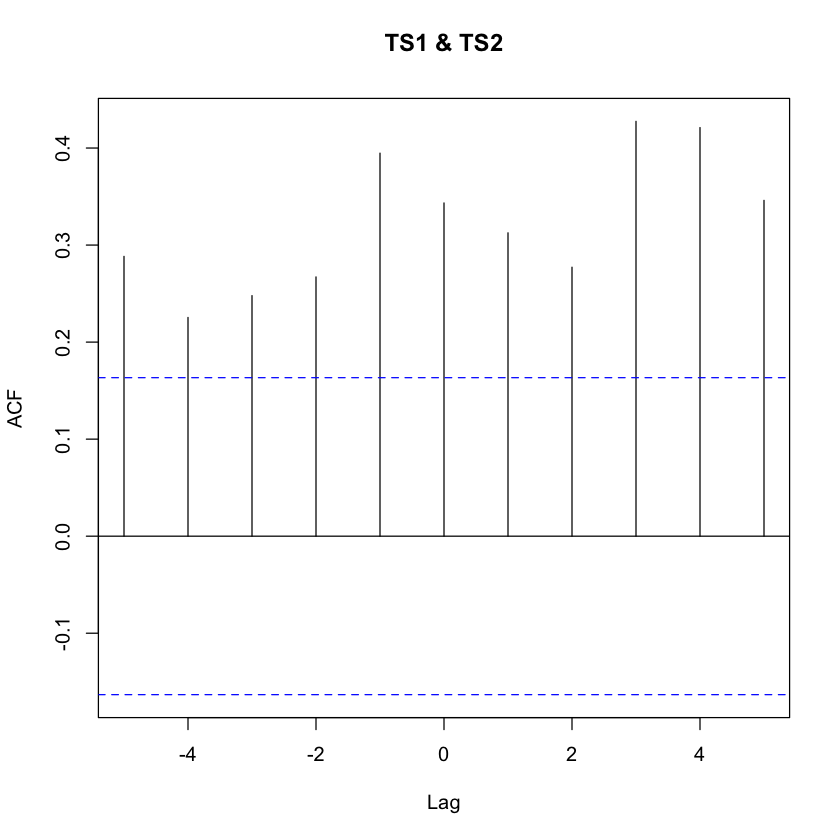

In [20]:
# example
TS1<-ts(as.numeric(data_noNA[80, 4:ncol(data_noNA)])) 
TS2<-ts(as.numeric(data_noNA[84, 4:ncol(data_noNA)]))
CrossCorr<-ccf(TS1, TS2, lag = 5, pl = TRUE)
two_week_weighted_sum(CrossCorr)

In [22]:
score_mat <- matrix(nrow=N, ncol=N)
# the (i,j) entry of score mat correspond to ccf(i,j)
for (i in 1:N){
    for (j in 1:N){
        if (j > i){
        TS1<-as.ts(as.numeric(data_noNA[i, 4:ncol(data_noNA)])) 
        TS2<-as.ts(as.numeric(data_noNA[j, 4:ncol(data_noNA)]))
        CrossCorr<-ccf(TS1, TS2, lag = 5, pl = FALSE)
        score_mat[i,j] <- two_week_weighted_sum(CrossCorr)
        }
    }
}

In [23]:
score_mat

[,1] [,2]     [,3]     [,4]     [,5]     [,6]      [,7]       [,8]     
 [1,] NA   2.220854 1.056474 5.707863 8.506024 0.7341249  5.0972866 0.3218734
 [2,] NA         NA 2.693054 5.105764 3.096454 7.1314345 -0.4931109 1.9814549
 [3,] NA         NA       NA 2.067933 6.590328 0.7297166 -5.0720060 0.6198980
 [4,] NA         NA       NA       NA 6.241690 7.5295041  0.9082160 2.4175094
 [5,] NA         NA       NA       NA       NA 0.6813310 -8.7136971 3.0322023
 [6,] NA         NA       NA       NA       NA        NA  7.2360239 2.4277452
 [7,] NA         NA       NA       NA       NA        NA         NA 2.6555958
 [8,] NA         NA       NA       NA       NA        NA         NA        NA
 [9,] NA         NA       NA       NA       NA        NA         NA        NA
[10,] NA         NA       NA       NA       NA        NA         NA        NA
[11,] NA         NA       NA       NA       NA        NA         NA        NA
[12,] NA         NA       NA       NA       NA        NA         NA        NA
[13,] NA         NA       NA       NA       NA        NA         NA        NA
[14,] NA         NA       NA       NA       NA        NA         NA        NA
[15,] NA         NA       NA       NA       NA        NA         NA        NA
[16,] NA         NA       NA       NA       NA        NA         NA        NA
[17,] NA         NA       NA       NA       NA        NA         NA        NA
[18,] NA         NA       NA       NA       NA        NA         NA        NA
[19,] NA         NA       NA       NA       NA        NA         NA        NA
[20,] NA         NA       NA       NA       NA        NA         NA        NA
[21,] NA         NA       NA       NA       NA        NA         NA        NA
[22,] NA         NA       NA       NA       NA        NA         NA        NA
[23,] NA         NA       NA       NA       NA        NA         NA        NA
[24,] NA         NA       NA       NA       NA        NA         NA        NA
[25,] NA         NA       NA       NA       NA        NA         NA        NA
[26,] NA         NA       NA       NA       NA        NA         NA        NA
[27,] NA         NA       NA       NA       NA        NA         NA        NA
[28,] NA         NA       NA       NA       NA        NA         NA        NA
[29,] NA         NA       NA       NA       NA        NA         NA        NA
[30,] NA         NA       NA       NA       NA        NA         NA        NA
[31,] ⋮    ⋮        ⋮        ⋮        ⋮        ⋮         ⋮          ⋮        
[32,] NA   NA       NA       NA       NA       NA        NA         NA       
[33,] NA   NA       NA       NA       NA       NA        NA         NA       
[34,] NA   NA       NA       NA       NA       NA        NA         NA       
[35,] NA   NA       NA       NA       NA       NA        NA         NA       
[36,] NA   NA       NA       NA       NA       NA        NA         NA       
[37,] NA   NA       NA       NA       NA       NA        NA         NA       
[38,] NA   NA       NA       NA       NA       NA        NA         NA       
[39,] NA   NA       NA       NA       NA       NA        NA         NA       
[40,] NA   NA       NA       NA       NA       NA        NA         NA       
[41,] NA   NA       NA       NA       NA       NA        NA         NA       
[42,] NA   NA       NA       NA       NA       NA        NA         NA       
[43,] NA   NA       NA       NA       NA       NA        NA         NA       
[44,] NA   NA       NA       NA       NA       NA        NA         NA       
[45,] NA   NA       NA       NA       NA       NA        NA         NA       
[46,] NA   NA       NA       NA       NA       NA        NA         NA       
[47,] NA   NA       NA       NA       NA       NA        NA         NA       
[48,] NA   NA       NA       NA       NA       NA        NA         NA       
[49,] NA   NA       NA       NA       NA       NA        NA         NA       
[50,] NA   NA       NA       NA       NA       NA        NA         NA       
[51,] NA   NA       NA      

In [24]:
process_scores<- function(score_mat){
    # summary stats of scores
    scores = c(score_mat)
    print(summary(scores))
    print ( c("Mean: ",mean(scores,na.rm = TRUE)) )
    print( c("SD: ",sd(scores,na.rm = TRUE)) )
    hist(scores,
         breaks=50, freq=FALSE,
         main="Histogram of Correlation Scores",
         xlab="Correlation Score",
         col="steelblue")
    # heatmap of score matrix
    melted_score = melt(score_mat, na.rm = TRUE) 
    colnames(melted_score) <- c("Region1", "Region2", "Score")
    ggplot(data=melted_score, aes(x=Region1, y=Region2, fill=Score)) +
    geom_tile(colour="white") +
    scale_fill_gradient2(low = "#a6611a", high = "#018571", mid = "#f5f5f5", midpoint = 0)
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-15.622  -1.877   0.359   0.717   3.099  24.285   20145 
[1] "Mean: "            "0.716722620187719"
[1] "SD: "             "4.02517678620107"


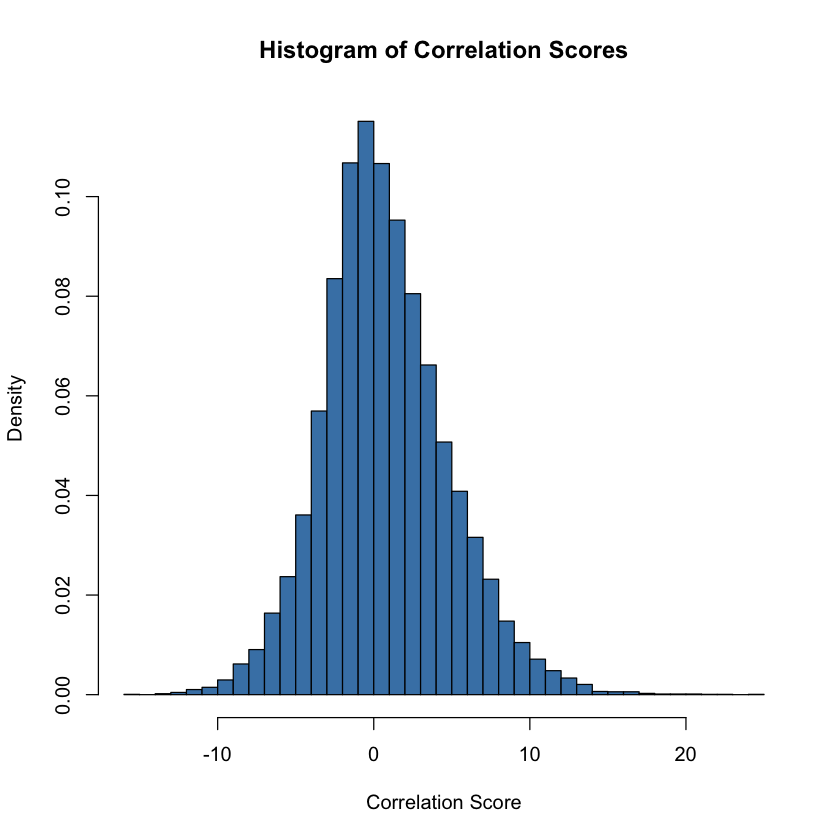

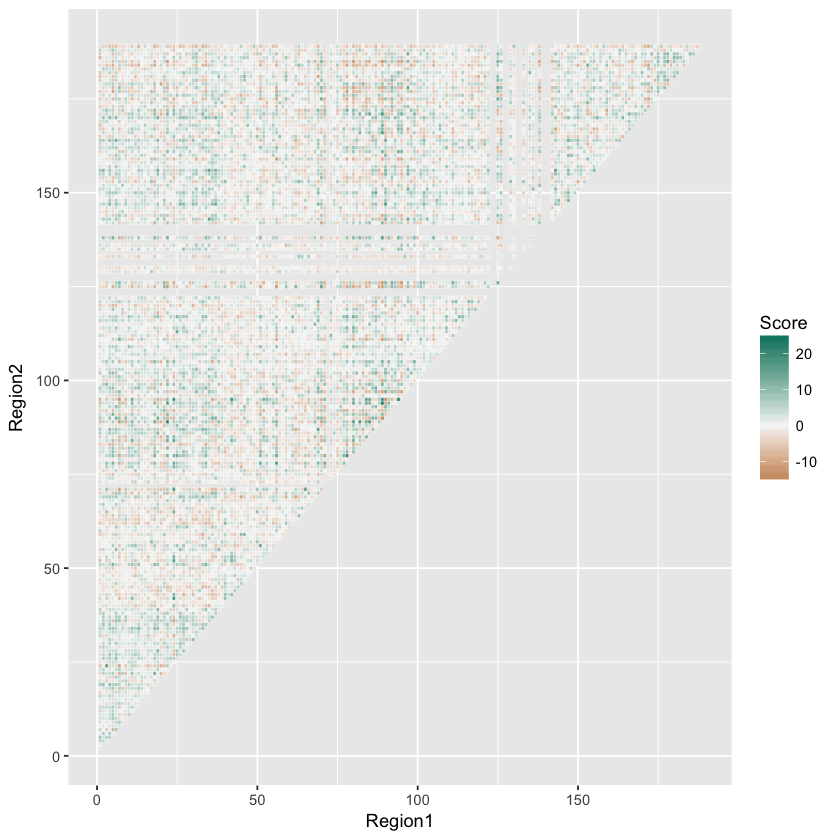

In [25]:
################
# ten-week sum #
################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-15.622  -1.877   0.359   0.717   3.099  24.285   20145 
[1] "Mean: "            "0.716722620187719"
[1] "SD: "             "4.02517678620107"


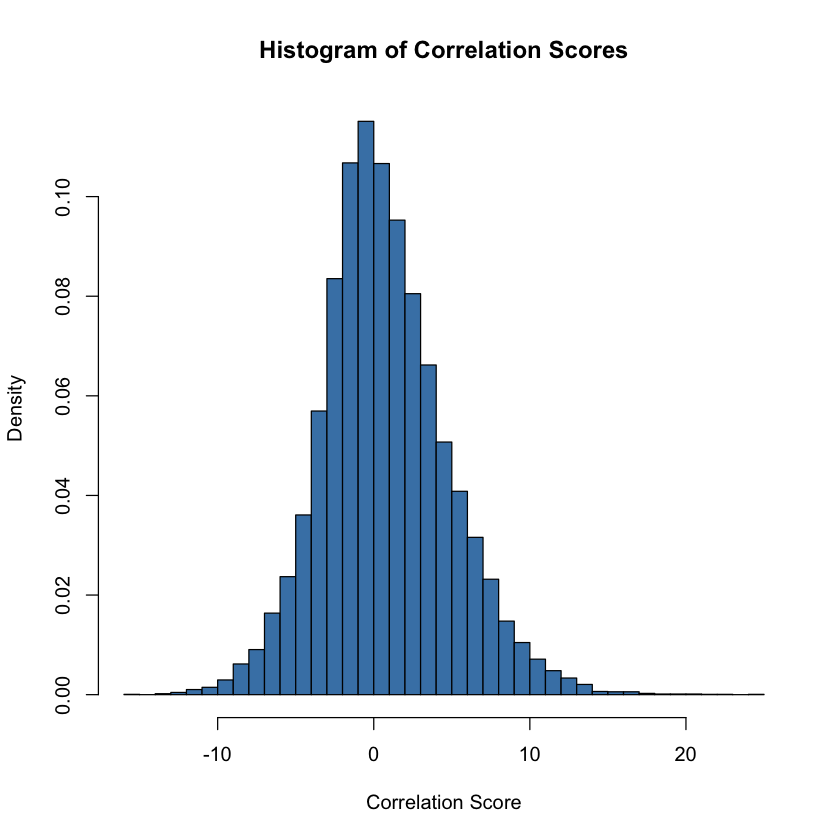

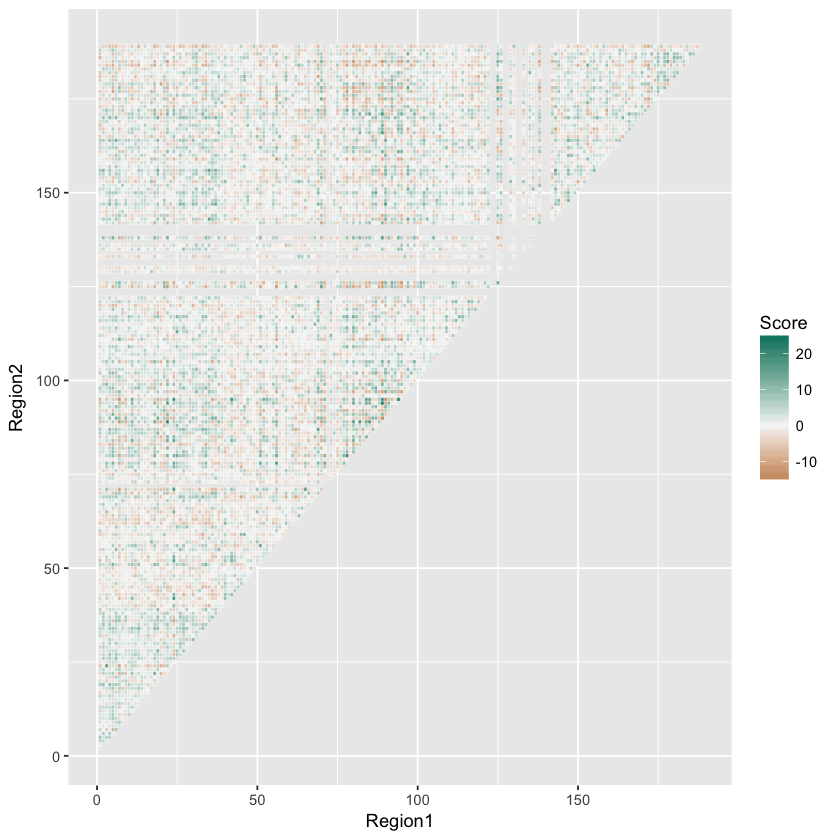

In [25]:
#########################
# ten-week weighted sum #
#########################
process_scores(score_mat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-15.622  -1.877   0.359   0.717   3.099  24.285   20145 
[1] "Mean: "            "0.716722620187719"
[1] "SD: "             "4.02517678620107"


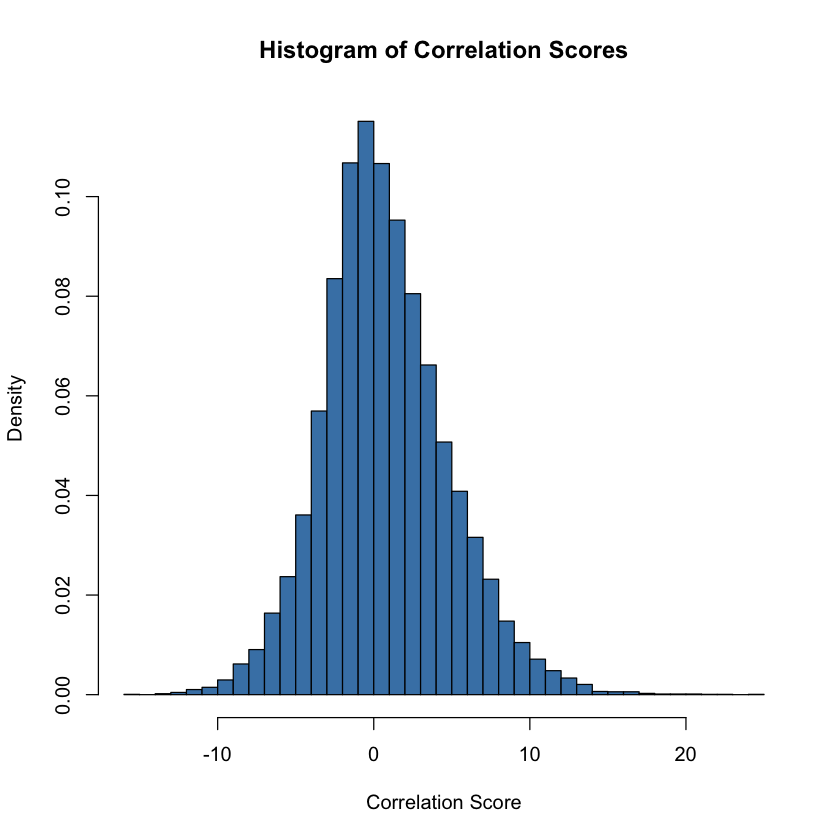

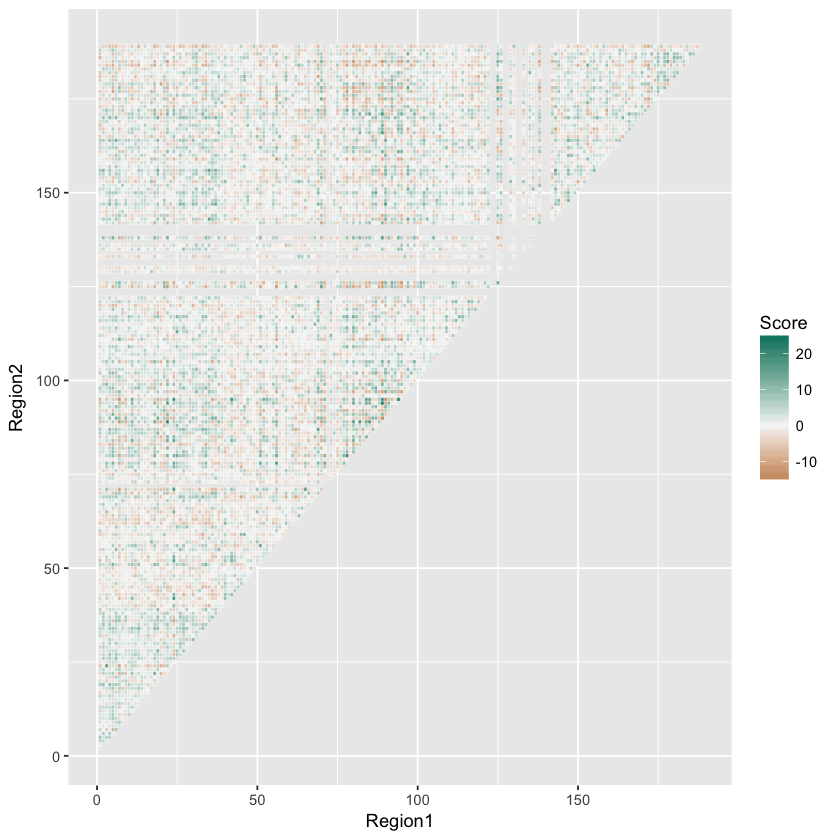

In [26]:
#########################
# two-week weighted sum #
#########################
process_scores(score_mat)

In [28]:
# Given two indices, plot their corrsponding time series
# if ccf_disp is TRUE, also plot the output graph of ccf function
visualize_corr <- function(index1, index2, ccf_disp=FALSE){
TS1<-ts(as.numeric(data_noNA[index1, 4:ncol(data_noNA)])) 
TS2<-ts(as.numeric(data_noNA[index2, 4:ncol(data_noNA)]))

ts.plot(TS1, TS2,
       gpars=list(xlab="Week", ylab="Cases", col=c("red","blue")))
legend("topleft",legend=c( paste(toString(index1),index2region(index1)), paste(toString(index2),index2region(index2))),
       col=c("red", "blue"),lty=c(1,1))

CrossCorr<-ccf(TS1, TS2, lag = 5, pl = ccf_disp)
score <- five_week_weighted_sum(CrossCorr)[[1]]
    
title(sub = paste( "Correlation Score =",toString(score) ))
if (ccf_disp){
    upperCI <- calc_upperCI(CrossCorr$n.used, 0.95)
    lowerCI <- -upperCI
    # verify CI
    lags <- -5:5
    my_upperCI <- rep(upperCI,11)
    points(lags, my_upperCI, col = "red")
    my_lowerCI <- rep(lowerCI,11)
    points(lags, my_lowerCI, col = "red")
    }
}

In [29]:
# Given a score matrix, and an interger k
# visualize_corr for top/bottom k scores(depending on the value of top)
# in the increasing order of scores
# ccf_disp dictates if the output graph of ccf is displayed
visualize_top_k <- function(score_mat, k, top=TRUE, ccf_disp=FALSE){
    sorted_scores = sort(c(score_mat))
    bottom_k = sorted_scores[1:k]
    top_k = tail(sorted_scores,k)
    if (top) {
        for (score in top_k){
            index_pair = which(score_mat == score, arr.ind = TRUE)
            visualize_corr(index_pair[1],index_pair[2],ccf_disp)
        }
    }
    else {
        for (score in bottom_k){
            index_pair = which(score_mat == score, arr.ind = TRUE)
            visualize_corr(index_pair[1],index_pair[2],ccf_disp)
        }
    }
}

In [12]:
index2region <- function(index){
    return( paste(data_noNA[index,3],data_noNA[index,2],sep=",") )
}

In [13]:
index2region(2)

[1] "BANYO,ADAMAOUA"

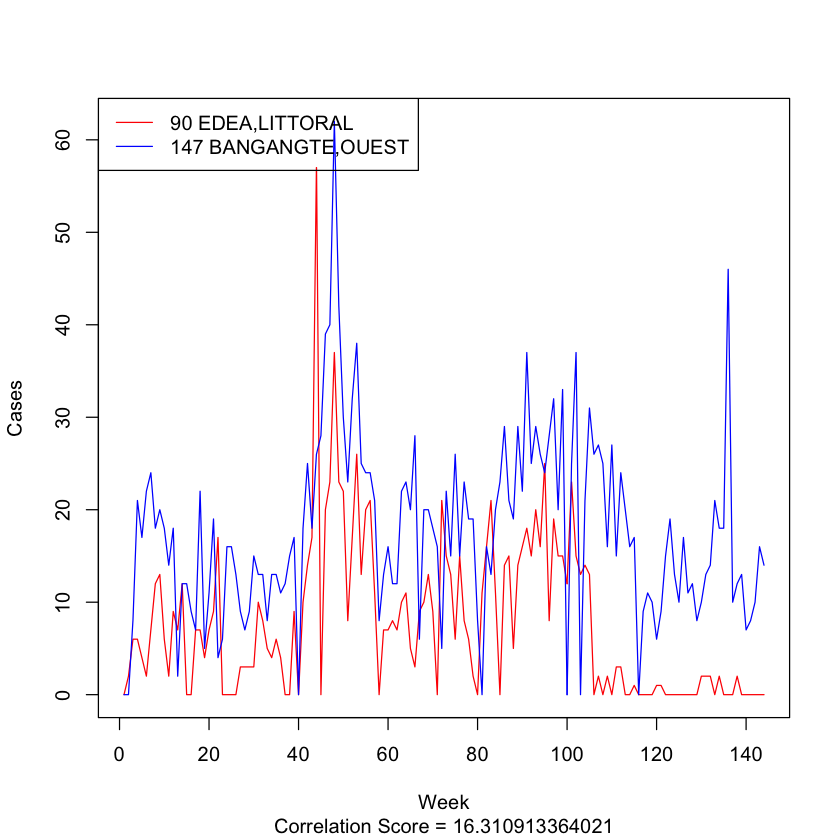

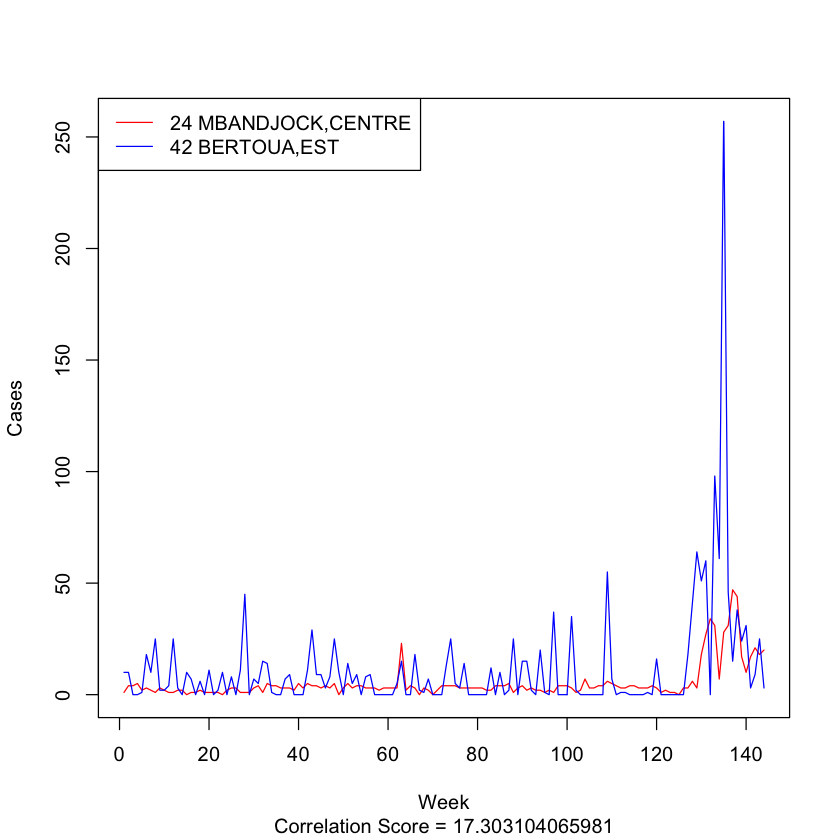

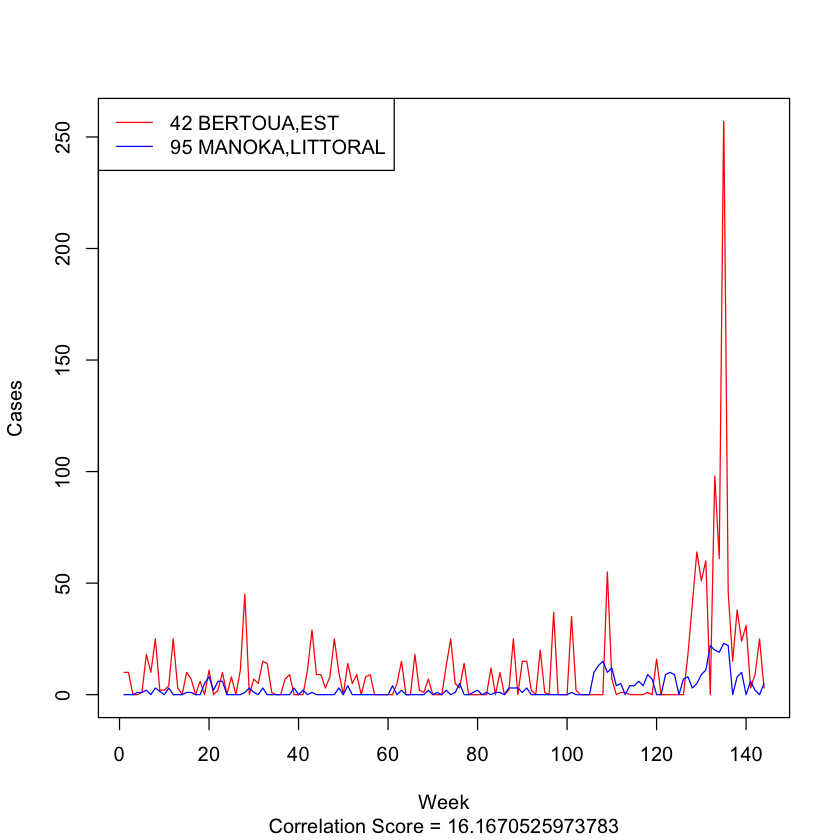

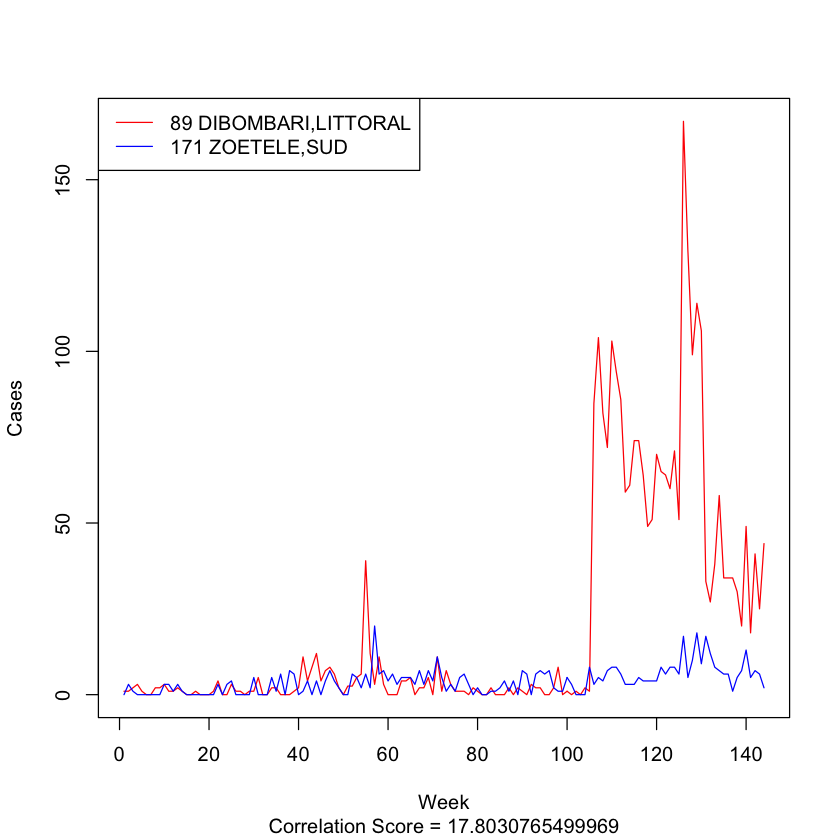

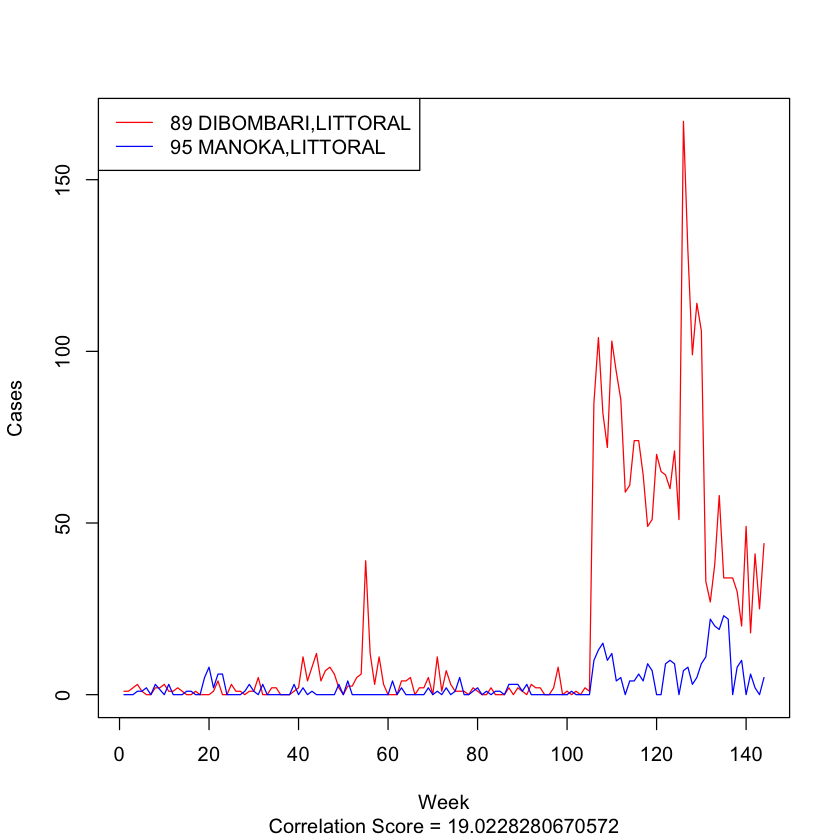

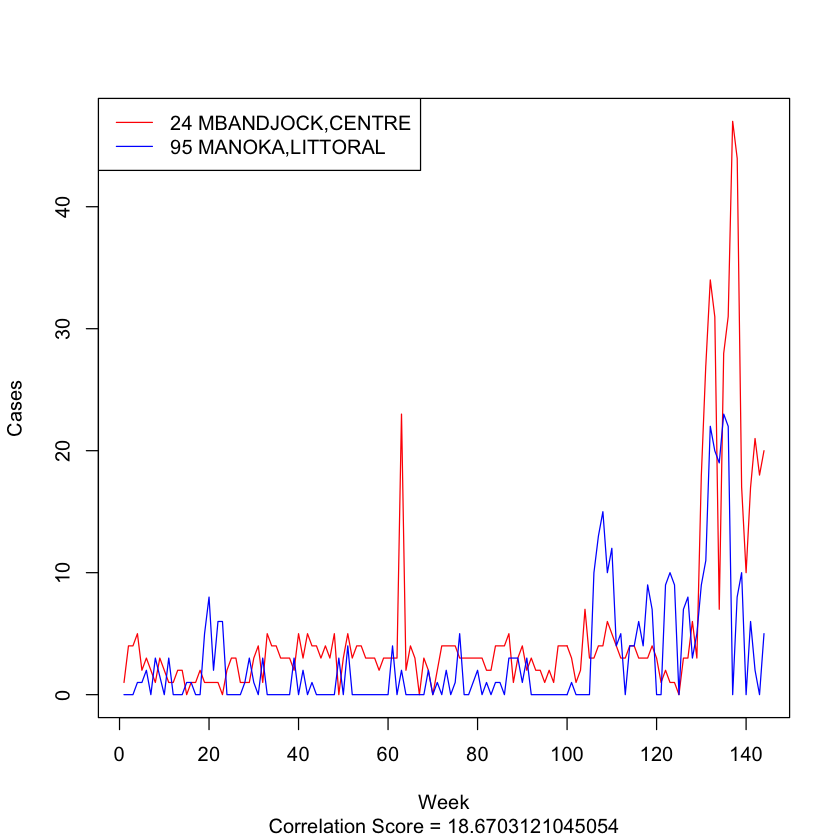

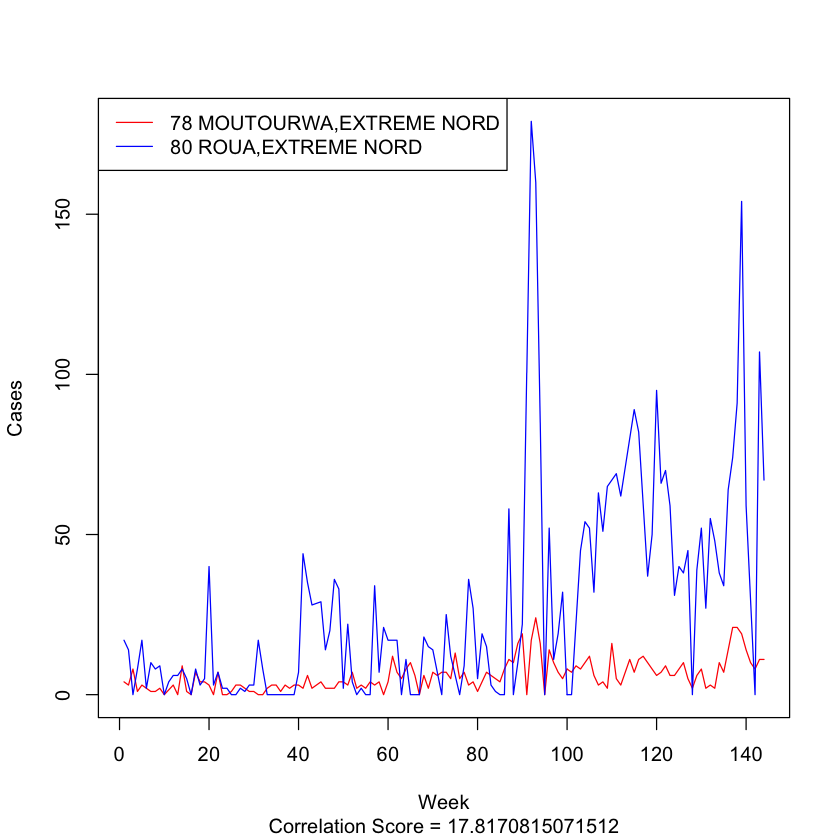

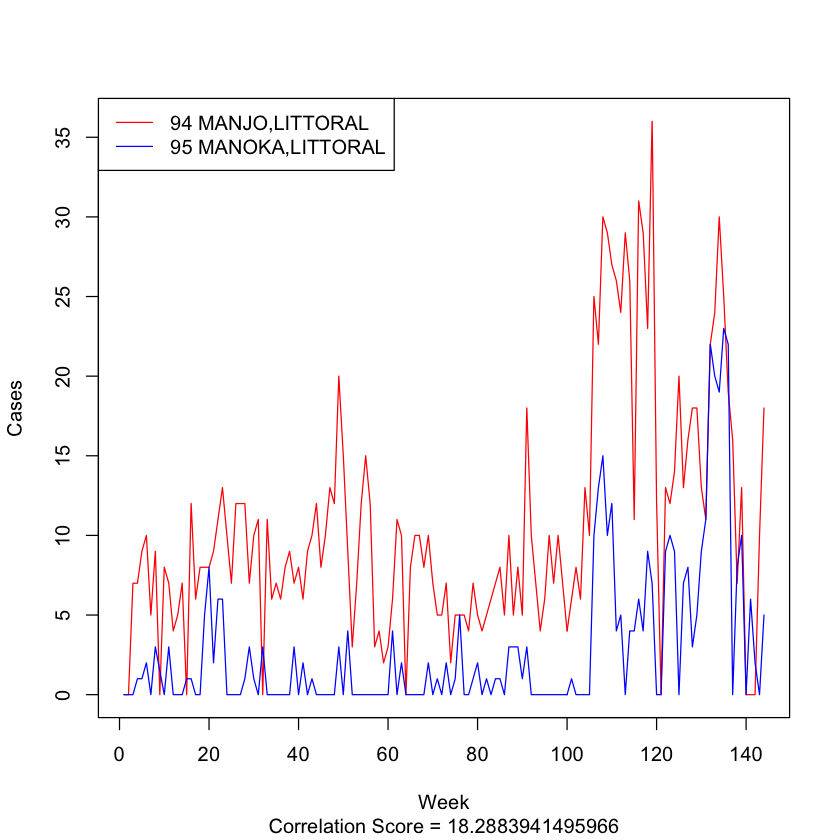

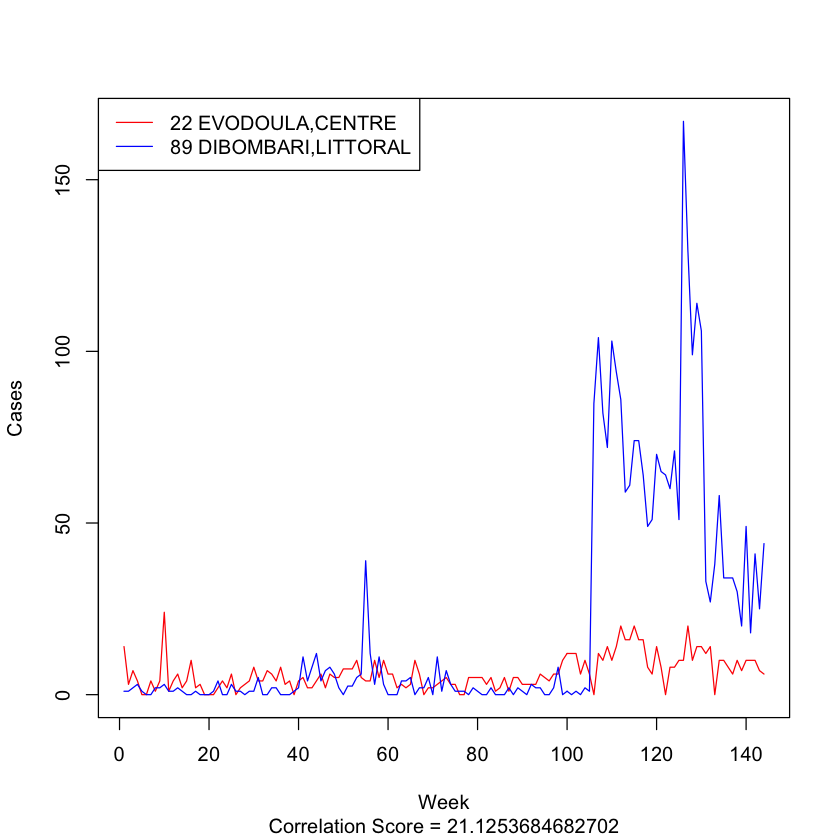

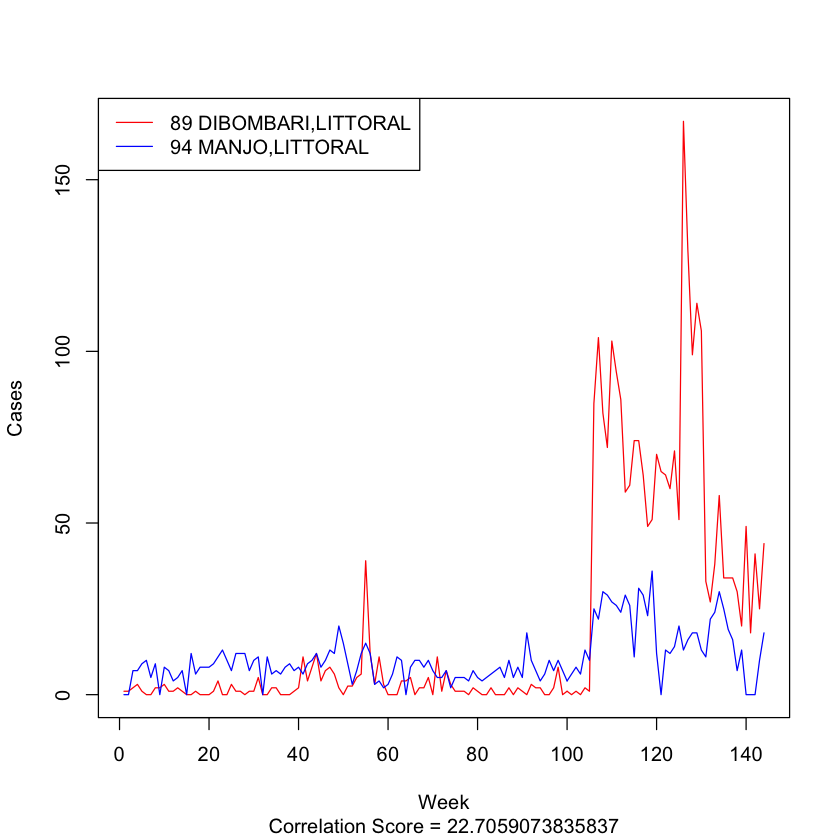

In [32]:
# visulization for top 10 scores (region pairs)
visualize_top_k(score_mat,10,top=TRUE,ccf_disp=FALSE)

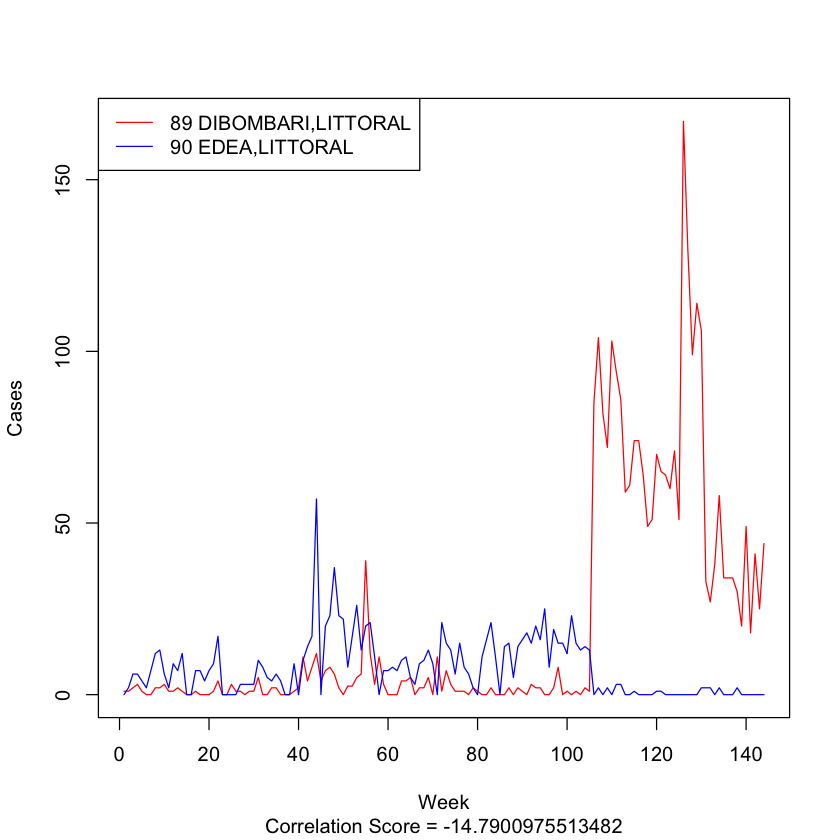

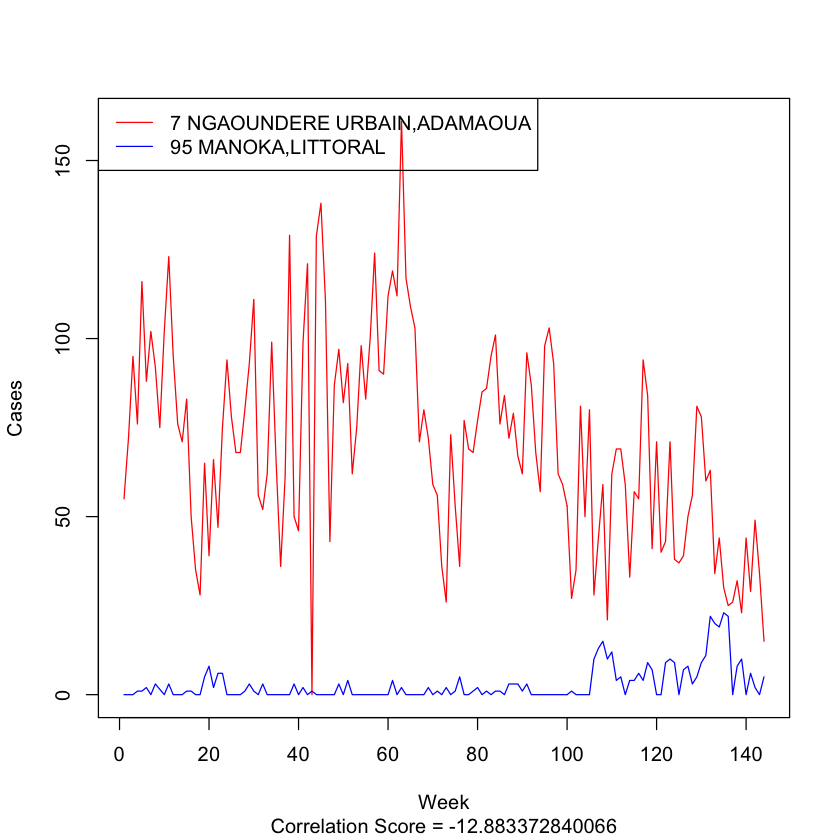

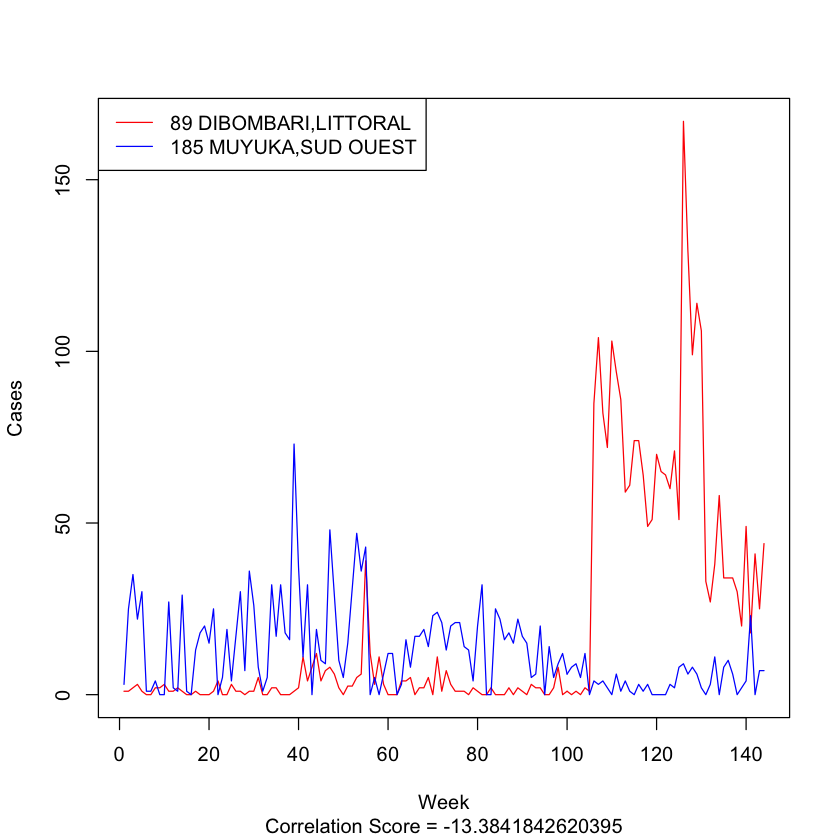

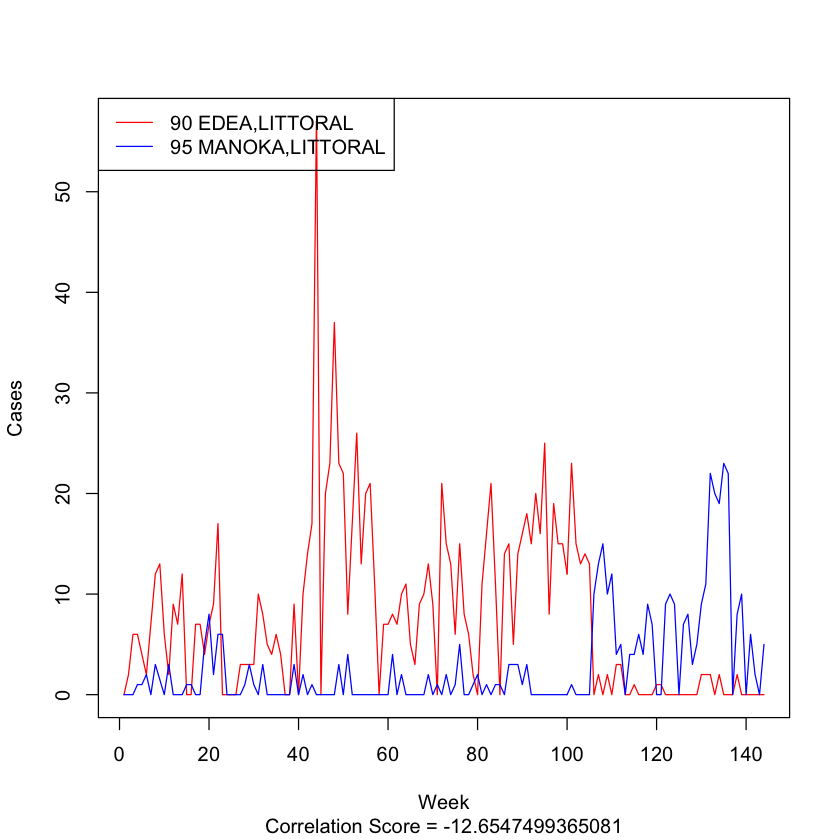

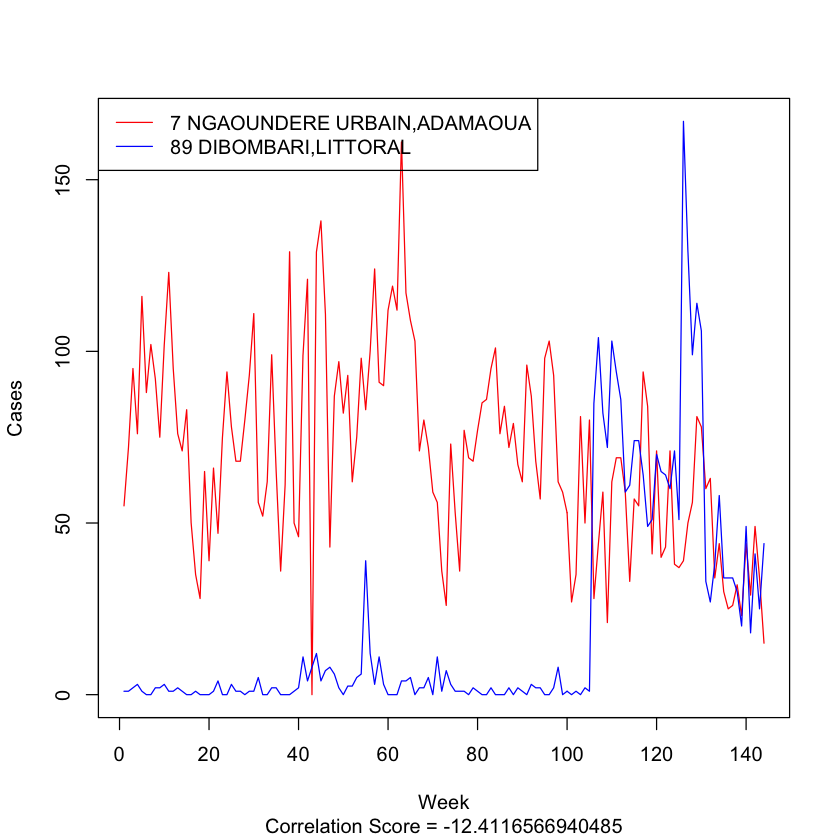

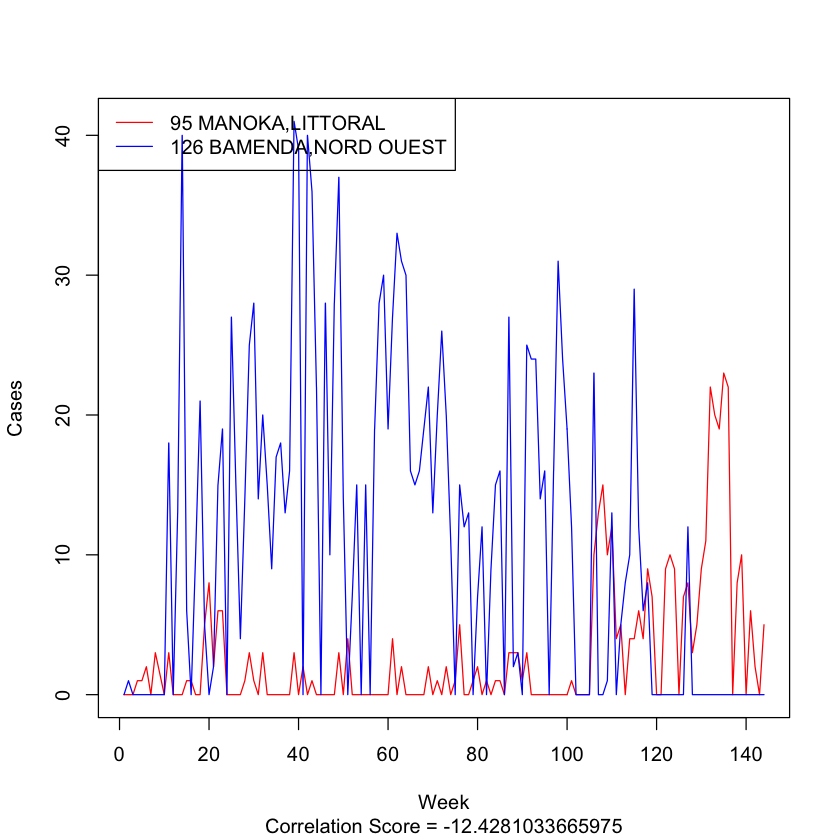

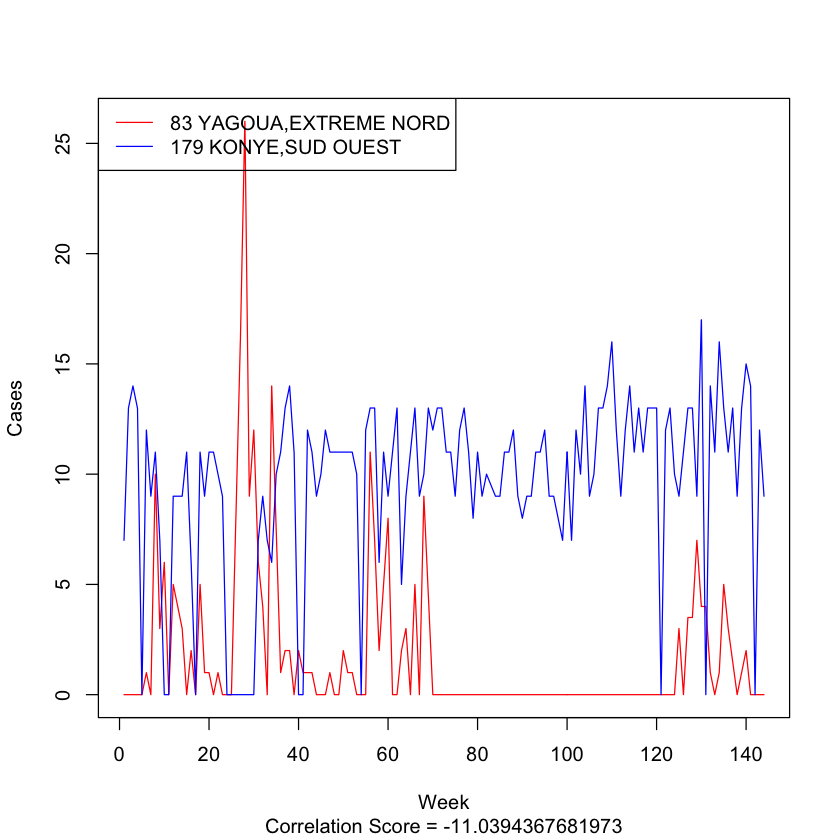

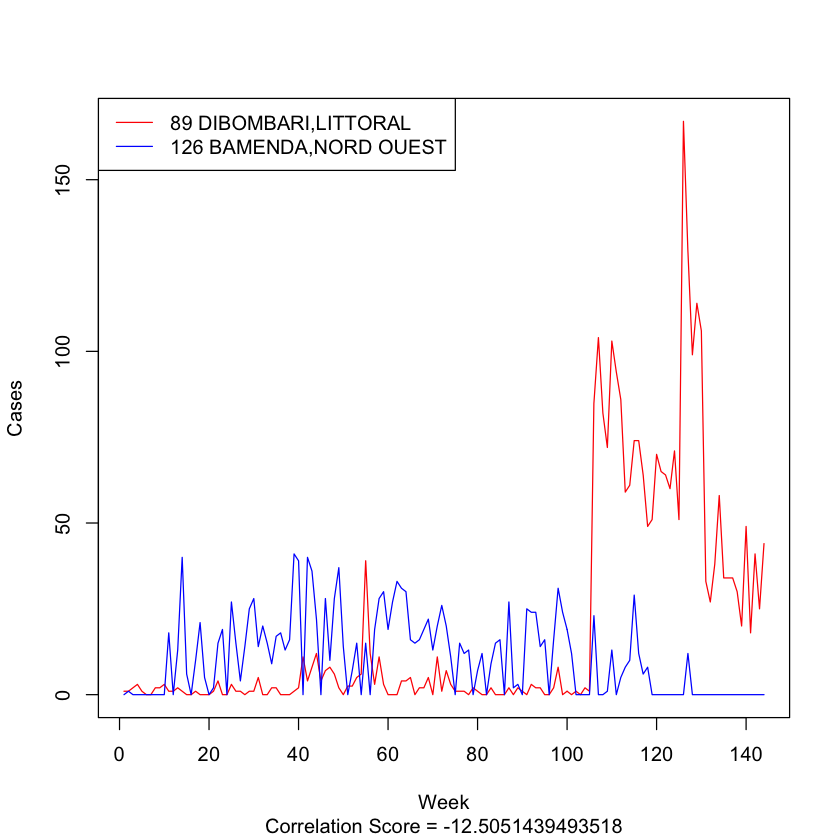

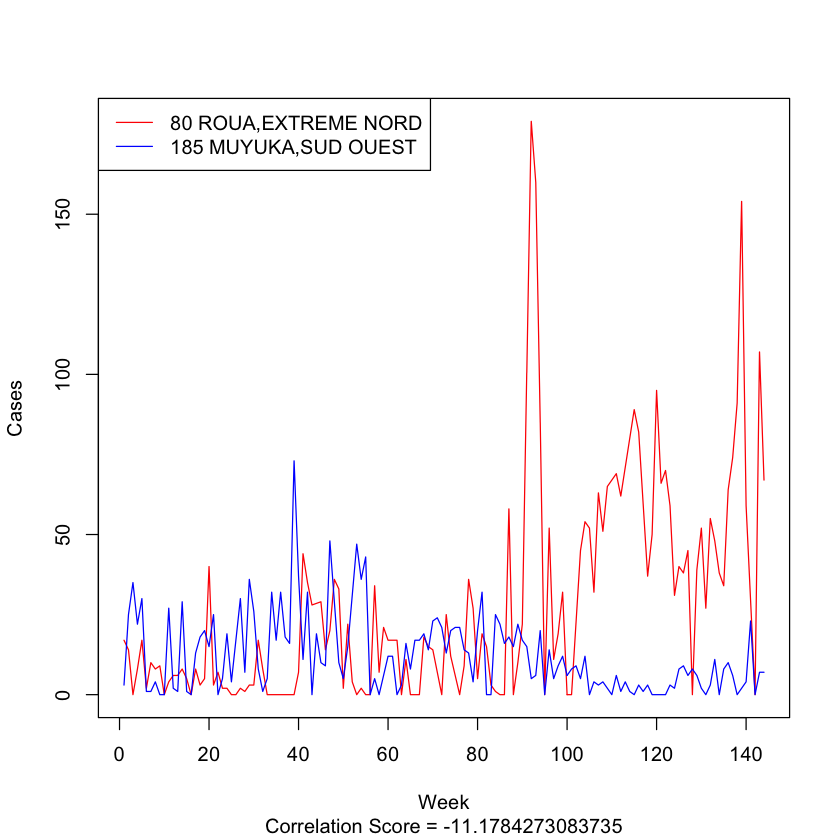

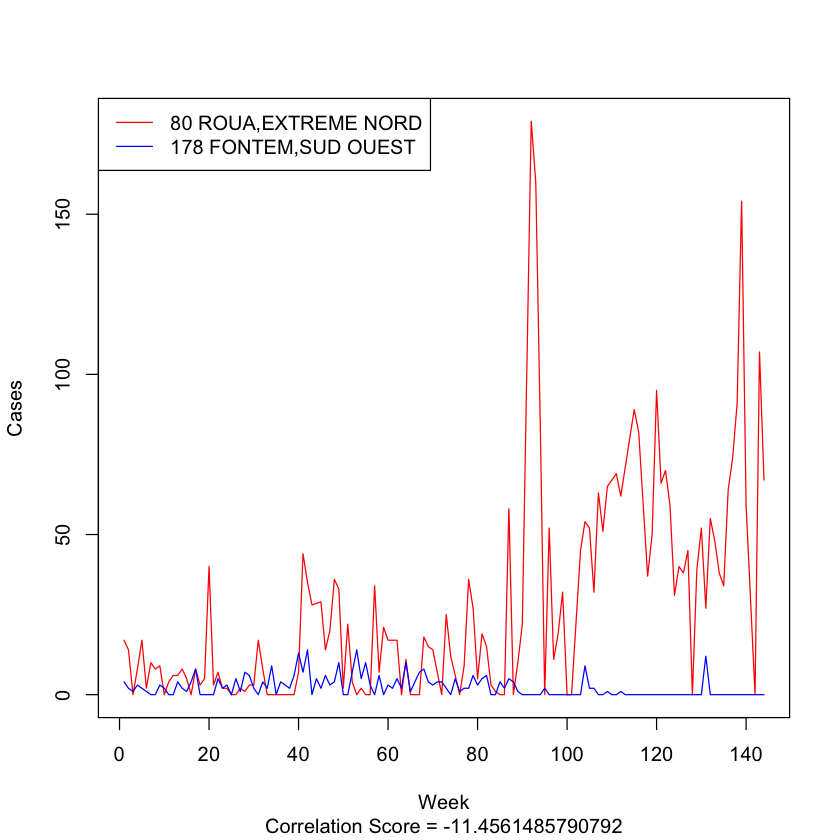

In [33]:
# visulization for bottom 10 scores (region pairs)
visualize_top_k(score_mat,10,top=FALSE,ccf_disp=FALSE)